# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [160]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

print 'foo'

foo


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [161]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
print 'foo'
mnist = fetch_mldata('MNIST original', data_home='~/datasets/training.csv')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape
print 'foo'

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]
#mini_train_labels[:9,]

foo
data shape:  (70000L, 784L)
label shape: (70000L,)
foo


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

def P1(num_examples=10):

    fig = plt.figure(figsize=(10,10))

    cell = 0 #index for cell location
    for num in range(num_examples): 
       d_index = np.where(mini_train_labels==num) #get indexes where label is num

       for j in range(10): #for 10 rows that match the index
           cell += 1
           figur = fig.add_subplot(10,10,cell)

           #reshape the data row to 28x28
           # d = np.reshape(mini_train_data[d_index[0][j]],(28,-1))

           #create image
           figur.imshow(np.reshape(mini_train_data[d_index[0][j]],(28,-1), cmap=plt.cm.grey_r))
           #turn off axis
           plt.axis("off")
       #end for j
    #end for i

    plt.show()
    print 'foo'



    

P1(10)


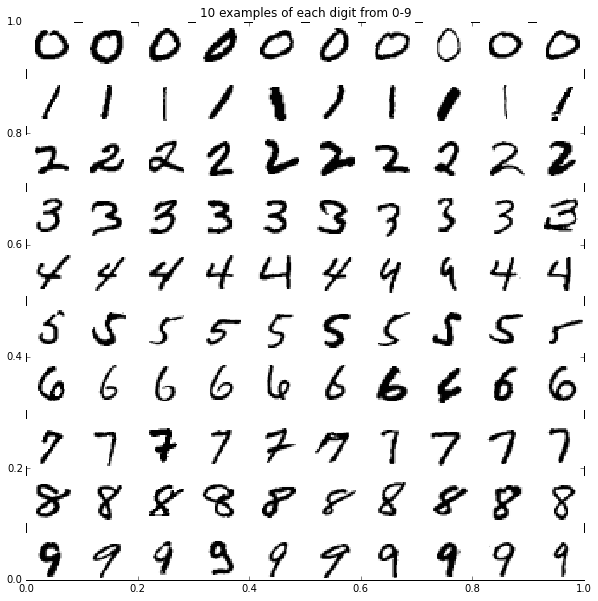

In [374]:
def P1(num_examples=10):
    #size of the figure
    fig = plt.figure(figsize=(num_examples,num_examples))
    
    plt.title('%s examples of each digit from 0-9' %num_examples)
    #i helps with positioning on the grid
    i = 1
    for digit in range(10): 
       # get the indices for all digits in an order
        digits = np.where(mini_train_labels==digit) 

        #now print 10 each of those digits
        for j in range(num_examples): 
           img = fig.add_subplot(num_examples,num_examples,i)
           img.imshow(np.reshape(mini_train_data[digits[0][j]],(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
           plt.axis("off")        
           i += 1

    plt.show()
P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [385]:
def P2(k_values):

### STUDENT START ###

    for k in k_values:
        # get the Classifier algorithm instance
        clf = KNeighborsClassifier(n_neighbors=k)
        #fit the data
        clf.fit(mini_train_data, mini_train_labels)
        #get the score
        accuracy = clf.score(dev_data, dev_labels)
        #print the accuaracy
        
        print("Mean accuracy on dev set for k = %s: %s" % (k, accuracy))
        #  part b of ps2
        if (k == 1):
                result = clf.predict(dev_data)
                print (classification_report(dev_labels, result))


### STUDENT END ###



k_values = [1, 3, 5, 7, 9]
P2(k_values)


#Answer part 3: which i dificult? 9 with the lowest f1-score 0.78

Mean accuracy on dev set for k = 1: 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Mean accuracy on dev set for k = 3: 0.878
Mean accuracy on dev set for k = 5: 0.869
Mean accuracy on dev set for k = 7: 0.865
Mean accuracy on dev set for k = 9: 0.863


ANSWER: part 3: which i dificult? 9 with the lowest f1-score 0.78


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [414]:
def P3(train_sizes, accuracies):

### STUDENT START ###
#do the same as P3 but for slective size of training set

    for size in train_sizes:
        
        print "Train size: %s" %size
        
        # time the operations
        time_start = time.time()
        
        clf = KNeighborsClassifier(n_neighbors=1)
        
        #fit the data
        clf.fit(train_data[:size], train_labels[:size])
        
      
        #get the score
        accuracy = clf.score(dev_data, dev_labels)
        
         #record time
        time_end = time.time()
        
        #print the accuaracy    
        print("Mean accuracy = %s" % ( accuracy))  
        
        #need for future
        accuracies.append(accuracy)
        
        
        print "Time taken: %.2f sec" % (time_end - time_start) #make float a double
        print "\n"
        
        
       

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


Train size: 100
Mean accuracy = 0.72
Time taken: 0.44 sec


Train size: 200
Mean accuracy = 0.786
Time taken: 0.92 sec


Train size: 400
Mean accuracy = 0.841
Time taken: 1.68 sec


Train size: 800
Mean accuracy = 0.884
Time taken: 2.00 sec


Train size: 1600
Mean accuracy = 0.902
Time taken: 5.25 sec


Train size: 3200
Mean accuracy = 0.926
Time taken: 11.00 sec


Train size: 6400
Mean accuracy = 0.937
Time taken: 7.77 sec


Train size: 12800
Mean accuracy = 0.959
Time taken: 29.08 sec


Train size: 25000
Mean accuracy = 0.97
Time taken: 58.07 sec




(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

It predicts [ 1.24307226] for n = 60000 
It predicts [ 1.03386514] for n = 60000 


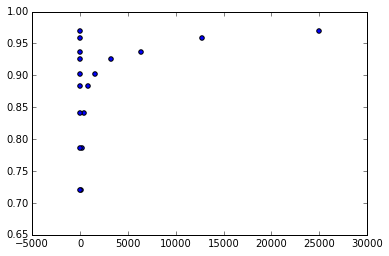

In [430]:
def P4():

### STUDENT START ###
    n = 60000
    lr = LinearRegression()

    x = train_sizes
    x = np.transpose(np.atleast_2d(x))
    y = accuracies
    plt.scatter(x, y)
   # plt.show
    lr.fit(x, y)
    y_result = lr.predict(n)
    
    print"It predicts %s for n = 60000 " %y_result 
    
    #from sklearn.linear_model.logistic import LogisticRegression
    #so that gave us 1.2 , accuracy greater than 1
    #let's use logit to restrict it bewteen 0 and 1
    #get a transformations
    #lr = LogisticRegression()
    lr2 = LinearRegression()
    lr2.fit(np.log(np.sqrt(x)), y)
    y_predicted = lr2.predict(np.log(np.sqrt(n)))
    plt.scatter(np.log(x), y)
    print"It predicts %s for n = 60000 " %y_predicted 
    
  
    
### STUDENT END ###

P4()


ANSWER: Accuracy was greater than 1. I tried log, it seemed to lower it a bit, but still came out to be slightly greater than 1.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
It was 4.0 printed as 9.0 


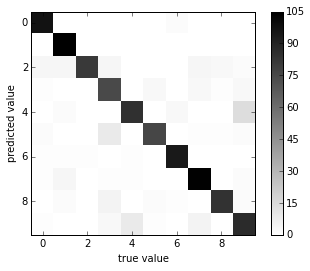

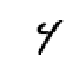

In [464]:
def P5():

### STUDENT START ###
#paart a: Fit a 1-NN and output a confusion matrix for the dev data
    # get the Classifier algorithm instance
    neigh = KNeighborsClassifier(n_neighbors=1)
    #fit the data
    neigh.fit(mini_train_data, mini_train_labels)
    result = neigh.predict(dev_data)
    confusionMatrix = confusion_matrix(dev_labels, result)
    plt.imshow(confusionMatrix, cmap=plt.cm.binary, interpolation = 'nearest')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')    
    
    print confusionMatrix #4 is the mos confusing- with 12 classified as 9
    

    
   # print result

        
    
    four = np.where(dev_labels==4) 
    nineResult = np.where(result==9)  

    
    fig = plt.figure(figsize=(10,10))
    
    for j in range(90): 
        if(four[0][j] == nineResult[0][j]):
            print "It was %s printed as %s "% (dev_labels[four[0][j]], result[nineResult[0][j]])
            
            img = fig.add_subplot(10,10,1)
        
            img.imshow(np.reshape(dev_data[nineResult[0][j]],(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis("off")
            plt.show()
            break;

   
    
    #print some 4's label as 9
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Classifier: Training data blurred...
Accuracy: 0.882
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.91      0.99      0.95       105
        2.0       0.97      0.82      0.89       102
        3.0       0.76      0.76      0.76        86
        4.0       0.92      0.80      0.86       104
        5.0       0.95      0.79      0.86        91
        6.0       0.91      0.96      0.94        98
        7.0       0.88      0.89      0.89       113
        8.0       0.85      0.92      0.88        96
        9.0       0.79      0.89      0.84       106

avg / total       0.89      0.88      0.88      1000

Classifier: Dev data blurred...
Accuracy: 0.825
             precision    recall  f1-score   support

        0.0       0.96      0.93      0.94        99
        1.0       0.63      0.99      0.77       105
        2.0       0.94      0.75      0.83       102
        3.0       0.70      0.79      0.74     

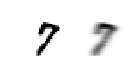

In [432]:
def P6():
    
### STUDENT START ### sigma 1.5 
    gaussian_train = []
    gaussian_dev = []
    from scipy import ndimage
    
    #blur the data
    for i in range(len(mini_train_data)):
        gaussian_train.append(ndimage.gaussian_filter(mini_train_data[i,], sigma=2))
    
    for i in range(len(dev_data)):
        gaussian_dev.append(ndimage.gaussian_filter(dev_data[i,], sigma=2))
    fig = plt.figure(figsize=(10,10))
    
    img = fig.add_subplot(10,10,1)
    img.imshow(mini_train_data[4,].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis("off")
    img = fig.add_subplot(10,10,2)
    img.imshow(gaussian_train[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis("off")
   # plt.show()
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(gaussian_train, mini_train_labels)
    result = clf.predict(dev_data)
    
    score = clf.score(dev_data, dev_labels)
    print "Classifier: Training data blurred..."
    print "Accuracy: %s" % (score)
    print classification_report(dev_labels, result)
    
    clf2 = KNeighborsClassifier(n_neighbors=1)
    clf2.fit(mini_train_data, mini_train_labels)
    result = clf2.predict(gaussian_dev)
    
    score = clf2.score(gaussian_dev, dev_labels)
    print "Classifier: Dev data blurred..."
    print "Accuracy: %s" % (score)
    print classification_report(dev_labels, result)
    
    clf3 = KNeighborsClassifier(n_neighbors=1)
    clf3.fit(gaussian_train, mini_train_labels)
    result = clf3.predict(gaussian_dev)
    
    score = clf3.score(gaussian_dev, dev_labels)
    print "Classifier: Dev data blurred..."
    print "Accuracy: %s" % (score)
    print classification_report(dev_labels, result)
    
    

### STUDENT END ###

P6()

ANSWER: Highest accuracy was obtained from when only training data was blurred.



(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [434]:
def P7():

### STUDENT START ###
    #Fit a Naive Bayes classifier and report accuracy on the dev data.
    
    bern = BernoulliNB()
    bern.fit(mini_train_data, mini_train_labels)
    result = bern.predict(dev_data)
    accuracy = bern.score(dev_data, dev_labels)
    print "Binarize = default Accuracy: %s" % accuracy
    
    bern = BernoulliNB(binarize=0.5)
    bern.fit(mini_train_data, mini_train_labels)
    result = bern.predict(dev_data)
    accuracy = bern.score(dev_data, dev_labels)
    print "\n Binarize = .5 Accuracy: %s" % accuracy
    
    bern = BernoulliNB(binarize=0.4)
    bern.fit(mini_train_data, mini_train_labels)
    result = bern.predict(dev_data)
    accuracy = bern.score(dev_data, dev_labels)
    print "\n Binarize = 0.4 Accuracy: %s" % accuracy
    
    bern = BernoulliNB(binarize=0.35)
    bern.fit(mini_train_data, mini_train_labels)
    result = bern.predict(dev_data)
    accuracy = bern.score(dev_data, dev_labels)
    print "\nBinarize = 0.35 Accuracy: %s" % accuracy
    
    #we have found the best binarize value
    
    bern = MultinomialNB()
    bern.fit(mini_train_data, mini_train_labels)
    result = bern.predict(dev_data)
    accuracy = bern.score(dev_data, dev_labels)
    print "\nMultinomial Accuracy: %s" % accuracy    
    #look for args
   
    
    
    #print classification report. No improvement with multi
    


    
### STUDENT END ###

P7()

Binarize = default Accuracy: 0.806

 Binarize = .5 Accuracy: 0.817

 Binarize = 0.4 Accuracy: 0.821

Binarize = 0.35 Accuracy: 0.823

Multinomial Accuracy: 0.794



ANSWER: Multinomial accuracy is lower than Binomial. I also ound the value 0.35 as the best value for binarize.


(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [435]:
def P8(alphas):

### STUDENT START ###
    clf = BernoulliNB(binarize=0.35)
    gridSearch = GridSearchCV(clf, alphas)
    gridSearch.fit(mini_train_data, mini_train_labels)
    scores= gridSearch.grid_scores_
    for index, value in enumerate(scores):
        print value
    
    return gridSearch


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
#print nb

mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}
mean: 0.82000, std: 0.02286, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.01865, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01791, params: {'alpha': 0.01}
mean: 0.81800, std: 0.01631, params: {'alpha': 0.1}
mean: 0.81600, std: 0.00896, params: {'alpha': 0.5}
mean: 0.80200, std: 0.01590, params: {'alpha': 1.0}
mean: 0.79800, std: 0.01555, params: {'alpha': 2.0}
mean: 0.75700, std: 0.01733, params: {'alpha': 10.0}


In [264]:
print nb.best_params_

# The best value for alpha is 0.01 with an accuracy of .82 (alphas 0.001, and 0.0001 are also in tie with alpha =0.01)
# The accuracy is 0.092 when alpha is 0


{'alpha': 0.0001}


ANSWER: The best value for alpha is 0.01 with an accuracy of .82 (alphas 0.001, and 0.0001 are also in tie with alpha =0.01)
The accuracy is 0.092 when alpha is 0



(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [504]:
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    result = gnb.predict(dev_data)
    print "Accuracy for GNB %s" %(gnb.score(dev_data, dev_labels)) #.495
    print "Classification resport"
    print classification_report(dev_labels, result) #4, 8 and 2 have low f1
   
    #these values yield the max accuracy
       
    gnb.sigma_ = gnb.sigma_ + 0.01
    gnb.theta_ = gnb.theta_ - 0.05
    result = gnb.predict(dev_data)
    print "Accuracy for GNB %s" %(gnb.score(dev_data, dev_labels))
    
### STUDENT END ###

gnb = P9()

Accuracy for GNB 0.627
Classification resport
             precision    recall  f1-score   support

        0.0       0.76      0.84      0.80        99
        1.0       0.82      0.89      0.85       105
        2.0       0.62      0.40      0.49       102
        3.0       0.62      0.47      0.53        86
        4.0       0.80      0.39      0.53       104
        5.0       0.52      0.37      0.44        91
        6.0       0.69      0.88      0.77        98
        7.0       0.85      0.50      0.63       113
        8.0       0.41      0.61      0.49        96
        9.0       0.47      0.88      0.61       106

avg / total       0.66      0.63      0.62      1000

Accuracy for GNB 0.8


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

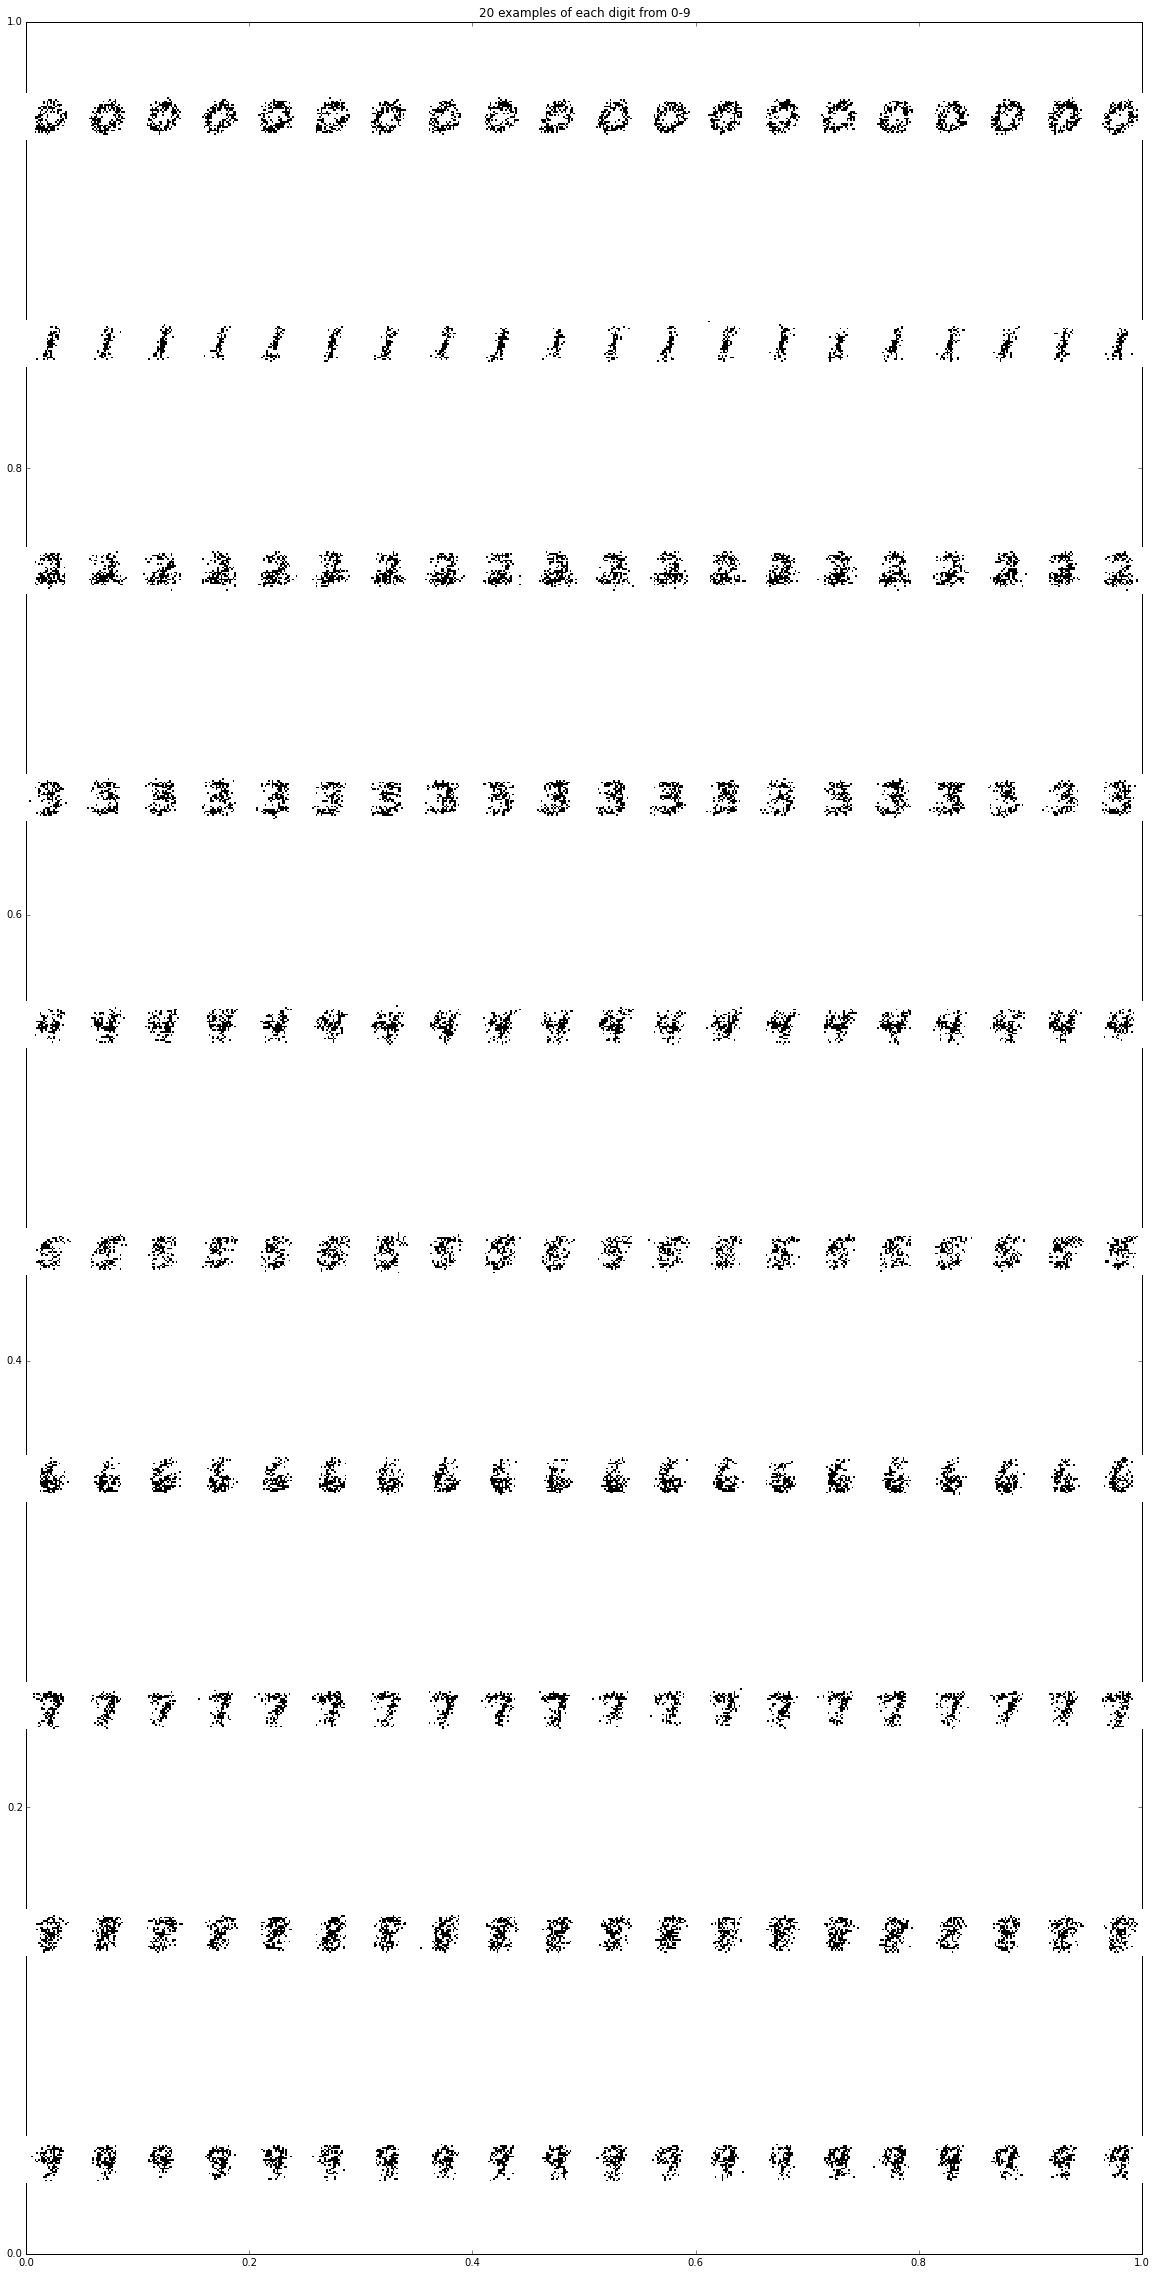

In [265]:
def P10(num_examples):

### STUDENT START ###
    nb = BernoulliNB(binarize=0.38, alpha =0.01)
    nb.fit(mini_train_data, mini_train_labels)
    
   # print nb.feature_log_prob_.shape
    
    fig = plt.figure(figsize=(20,40))
    
    plt.title('%s examples of each digit from 0-9' %num_examples)
     
   # print len(nb.feature_log_prob_)
    d = np.random.rand(784)
   # print d.shape
    digits = []
    loc = 1
    for digit in range(10): 
        for j in range(num_examples):
            rd = np.random.rand(784) 
        
            for i, val in enumerate(rd):
                pixelProb = np.exp(nb.feature_log_prob_[digit][i])
                if(val < pixelProb):
                    rd[i] = 1
                else:
                    rd[i] = 0
           
            img = fig.add_subplot(10,20,loc)
            img.imshow(rd.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
            plt.axis("off")
            loc += 1

# Not so great with the curves of the digits (8 nd 5 are the worst). Very blotchy. I wonder if I feed this back in a classifier, what would teh accuracy be.


### STUDENT END ###

P10(20)

ANSWER: Not so great with the curves of the digits (8 nd 5 are the worst). Very blotchy. I wonder if I feed this back in a classifier, what would teh accuracy be.




(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [508]:

def P11(buckets, correct, total):
    
### STUDENT START ###

    clf = BernoulliNB(binarize = 0.35)
    clf.fit(mini_train_data, mini_train_labels)
    maximum = [0 for i in dev_data]
    k = 0


                    
        # val = np.where(np.greater_equal(buckets,np.amax(probabilities[0]))) 

                
### STUDENT END ###




buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
#print correct


P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9990000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999900000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999990000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999900    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()